<a href="https://colab.research.google.com/github/pitaconsumer/pitaconsumer.github.io./blob/master/Customer_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective: Segment Mall Customers Using KMeans Clustering**
Challenge: represent the identified clusters across three features in a three-dimensional visual to conclude.


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #Use for binary variable labelencode = LabelEncoder()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
#Open data
mall = pd.read_csv('/content/Mall_Customers.csv')
mall


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
#Rename longest column (last one) to more easily reference customer scoring
mall.rename(columns={"Spending Score (1-100)": "spend_score"}, inplace=True)
mall

,CustomerID,Gender,Age,Annual Income (k$),spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
#Understand data 
#More comprehensive method: profile = ProfileReport(mall) profile
mall.describe()


,CustomerID,Age,Annual Income (k$),spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
#Check Data types 
#Gender is string, need to encode for clustering
mall.dtypes

CustomerID             int64
Gender                object
Age                    int64
Annual Income (k$)     int64
spend_score            int64
dtype: object

In [13]:
#What's the null value situation?
mall.isnull().sum()


CustomerID            0
Gender                0
Age                   0
Annual Income (k$)    0
spend_score           0
dtype: int64

In [16]:
#Small, Clean data set with no null values
#Drop unnecessary column, like 'CustomerID' for easier processing of KMeans clustering
mall.drop(['CustomerID'], axis=1)

,Gender,Age,Annual Income (k$),spend_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [31]:
#Transform 'Gender' feature


labelencode = LabelEncoder()
mall = mall.apply(labelencode.fit_transform)
#Check for encoding on 'Gender'
mall

,CustomerID,Gender,Age,Annual Income (k$),spend_score
0,0,1,1,0,30
1,1,1,3,0,67
2,2,0,2,1,4
3,3,0,5,1,64
4,4,0,13,2,31
...,...,...,...,...,...
195,195,0,17,61,66
196,196,0,27,62,23
197,197,1,14,62,61
198,198,1,14,63,16


## Visualization of Income and Spend Scores

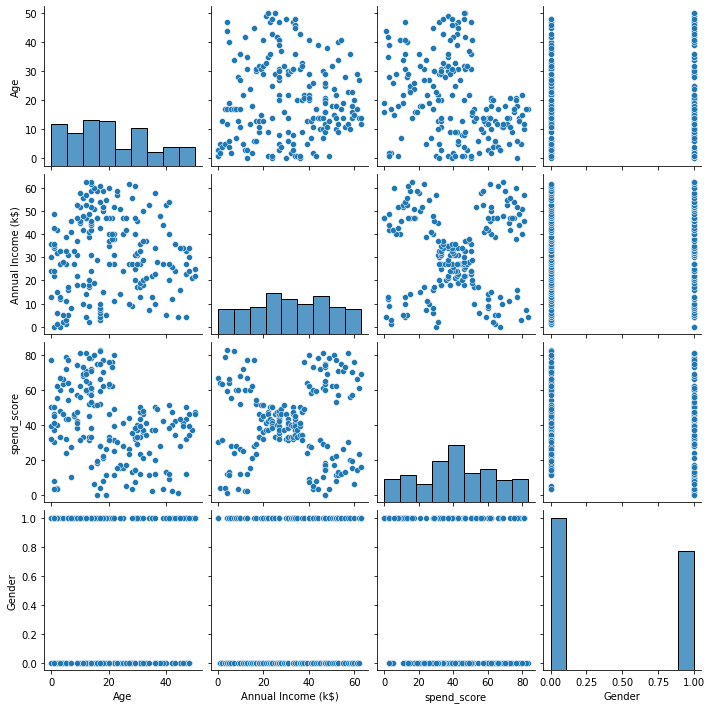

In [33]:
#Visualize pairings of two-feature combos
sns.pairplot(mall[['Age','Annual Income (k$)', 'spend_score','Gender']])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

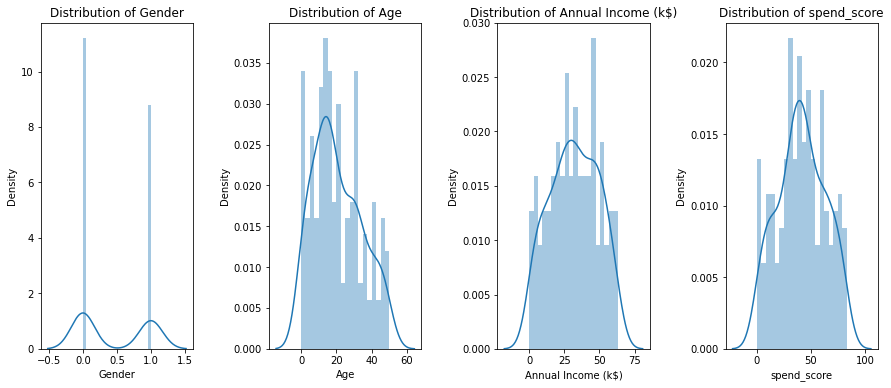

In [34]:
# Visualize Distribution of Features

plt.figure(1, figsize=(15,6))
n=0
for x in ['Gender','Age','Annual Income (k$)', 'spend_score']:
  n+=1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(mall[x], bins=20)
  plt.title('Distribution of {}'.format(x))
plt.show()

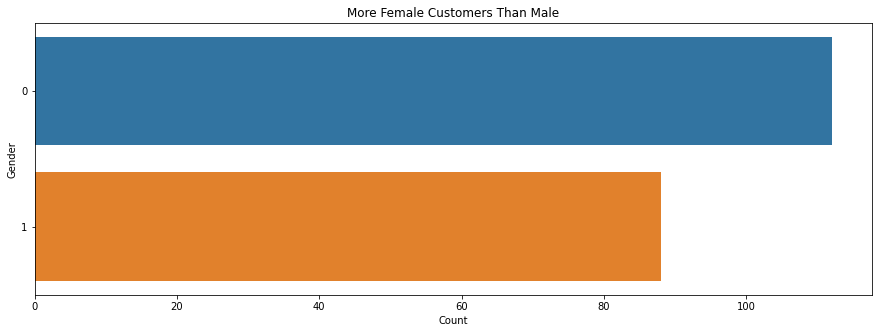

In [39]:
#Visualize Gender: Note 1 = Male, 0= Female
plt.figure(figsize=(15,5))
ax=sns.countplot(data=mall,y='Gender') 
ax.set(xlabel='Count', ylabel='Gender', title='More Female Customers Than Male')
plt.show()

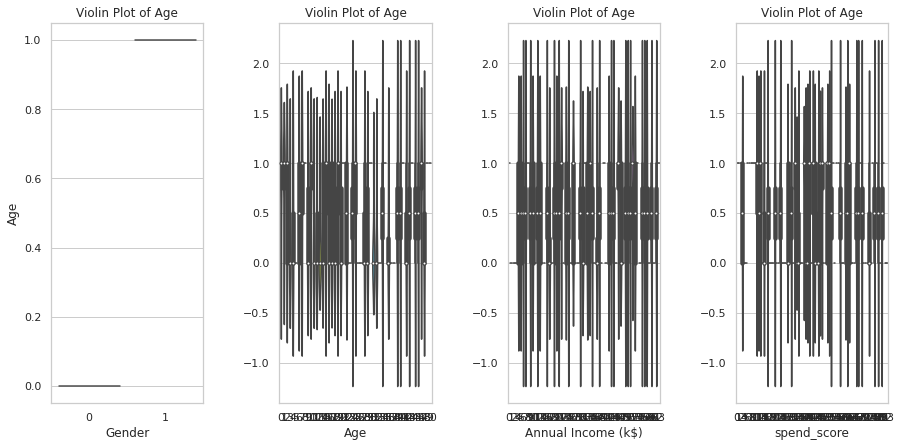

In [43]:
#Violin Plot
#Create a loop for columns per plot 
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Gender','Age','Annual Income (k$)', 'spend_score']:
  n+=1
  plt.subplot(1,4,n)
  sns.set(style='whitegrid')
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.violinplot(x=cols, y='Gender',data=mall)
  plt.ylabel('Age' if n==1 else'' )
  plt.title('Violin Plot of Age')
plt.show()


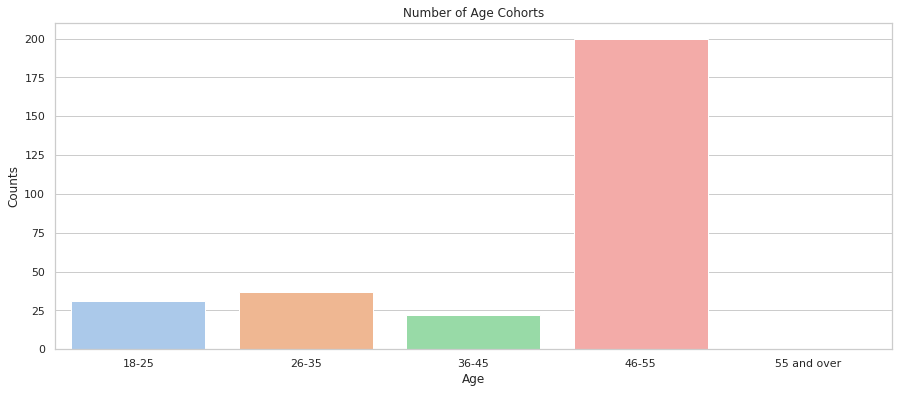

In [50]:
#Breakdown age in cohorts
age_18_25 = mall[(mall.Age >= 18) & (mall.Age <= 25)]
age_26_35 = mall[(mall.Age >= 26) & (mall.Age <= 35)]
age_36_45 = mall[(mall.Age >= 36) & (mall.Age <= 45)]
age_46_55 = mall[(mall.Age >= 46) & (mall.Age) <= 55]
age56_above = mall[(mall.Age >= 56)]

#create a list
agex = ['18-25','26-35','36-45','46-55','55 and over']

#Need to identify the counts for each cohort created in agex list 
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),
        len(age56_above.values)]

#Plot the age cohorts
plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette='pastel')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Number of Age Cohorts')
plt.show()


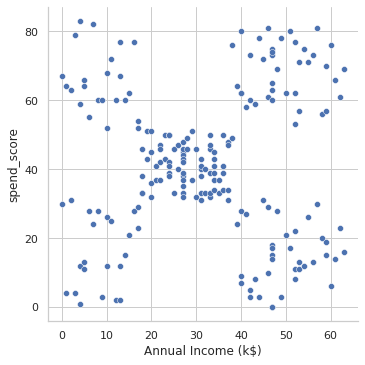

In [51]:
sns.relplot(x='Annual Income (k$)' , y='spend_score', data=mall)
plt.show()

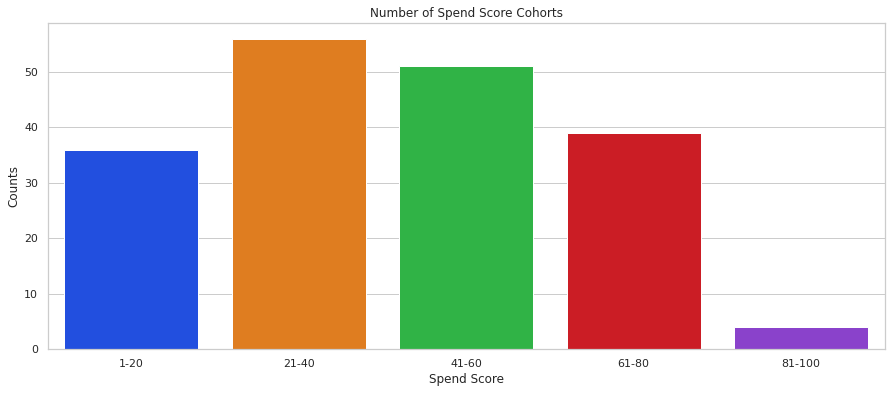

In [55]:
#We see in our Relational Plot there are some groupings based on our two features of interest
#Break down spend score cohorts

ss_1_20 = mall['spend_score'][(mall['spend_score'] >= 1) & (mall['spend_score'] < 20)]
ss_21_40 = mall['spend_score'][(mall['spend_score'] >= 21) & (mall['spend_score'] < 40)]
ss_41_60 = mall['spend_score'][(mall['spend_score'] >= 41) & (mall['spend_score'] < 60)]
ss_61_80 = mall['spend_score'][(mall['spend_score'] >= 61) & (mall['spend_score'] < 80)]
ss_81_100 = mall['spend_score'][(mall['spend_score'] >= 81) & (mall['spend_score'] < 100)]

#Repeat what we did w/age cohorts w/len function
ssx = ['1-20','21-40','41-60', '61-80', '81-100']
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),
       len(ss_61_80.values),len(ss_81_100.values)]

#Plot spend score cohorts
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette='bright')
plt.xlabel('Spend Score')
plt.ylabel('Counts')
plt.title('Number of Spend Score Cohorts')
plt.show()

                               

**Clustering **

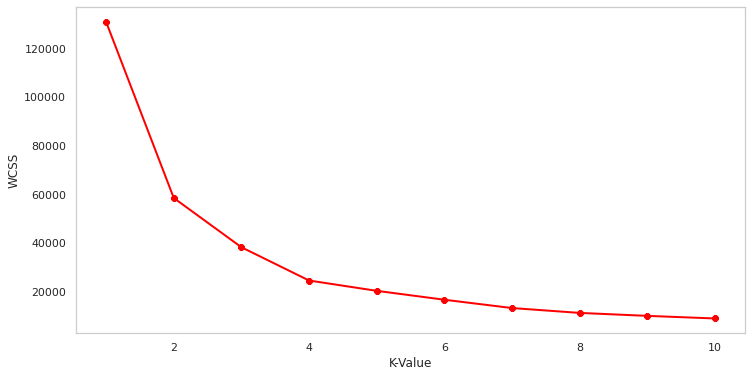

In [75]:
#Use Sum of Squares Method to identify optimum number of clusters
X1 = mall.loc[:, ['Age','spend_score']].values

#create list to Find optimum number of clusters
#from sklearn.cluster import KMeans
#from sklearn.cluster import cluster
from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.show()
              
              

We see that the elbow method reveals a bent at the K-value = 4 moment


In [82]:
#Identify the Labels from 4 clusters
X1 = mall.loc[:, ['Age','spend_score']].values

kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)


[3 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 3 0 1 0 3 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1
 0 1 0 2 0 2 3 1 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 0 3 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 2 0
 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 3
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [84]:
print(kmeans.cluster_centers_)

[[12.         68.13793103]
 [25.20408163 12.59183673]
 [37.34042553 39.68085106]
 [ 9.7826087  39.93478261]]


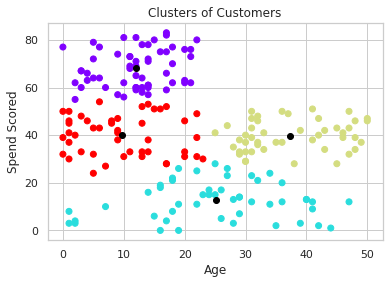

In [89]:
#Visualize Clusters in Plot

plt.scatter(X1[:,0], X1[:,1], c= kmeans.labels_, cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers Based on Spend Score')
plt.xlabel('Age')
plt.ylabel('Spend Scored')
plt.show()

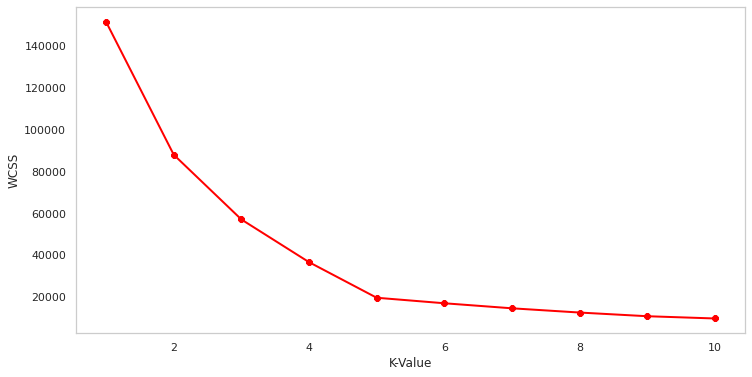

In [90]:
#Repeat Cluster Identification for for 'Income' Feature

#Use Sum of Squares Method to identify optimum number of clusters
X2 = mall.loc[:, ['Annual Income (k$)','spend_score']].values

#create list to Find optimum number of clusters
#from sklearn.cluster import KMeans
#from sklearn.cluster import cluster
from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.show()

We see that Elbow method shows a bend at K-value = 5


In [91]:
#Identify the Labels from 5 clusters
X2 = mall.loc[:, ['Annual Income (k$)','spend_score']].values

kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


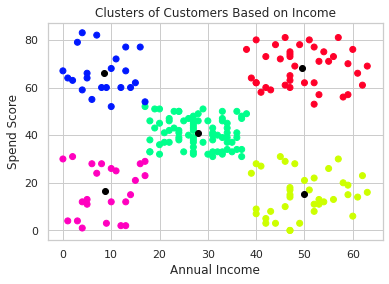

In [98]:
#Visualize Clusters for 'Income' in Plot

plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap= 'gist_rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers Based on Income')
plt.xlabel('Annual Income')
plt.ylabel('Spend Score')
plt.show()

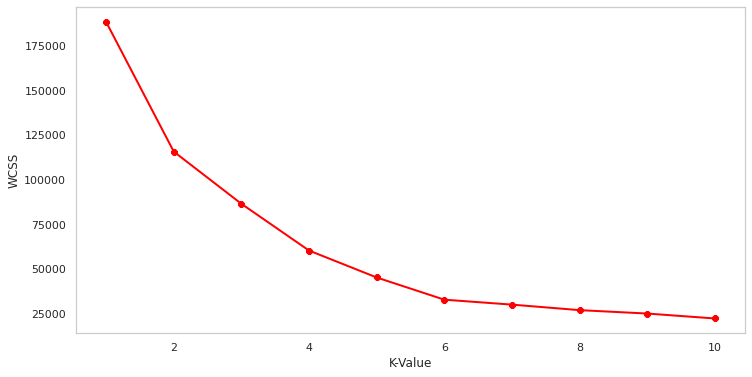

In [99]:
# Incorporate all features above to form clusters
X3 = mall.iloc[:,1:]

#create list to Find optimum number of clusters
#from sklearn.cluster import KMeans
#from sklearn.cluster import cluster
from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.show()

We see that the Elbow Method shows a bend at k-value = 6. This hints at representing 6 clusters utilizing our target 3 features. 

In [102]:
#Identify the Labels from 5 clusters

kmeans = KMeans(n_clusters=6)
label = kmeans.fit_predict(X3)
print(label)

[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 1 4 5 4 5 4 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 3 3 1 1 3 1 1 3 1 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 3 3 3 3 1 1 1 1 3 3 3 0 3 0 2 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [103]:
print(kmeans.cluster_centers_)

[[ 0.46153846 14.69230769 49.53846154 68.20512821]
 [ 0.43181818 37.65909091 27.36363636 40.43181818]
 [ 0.57142857 23.68571429 50.54285714 14.11428571]
 [ 0.35135135  8.89189189 29.7027027  39.97297297]
 [ 0.39130435  7.52173913  8.7826087  65.34782609]
 [ 0.40909091 26.13636364  8.45454545 16.18181818]]


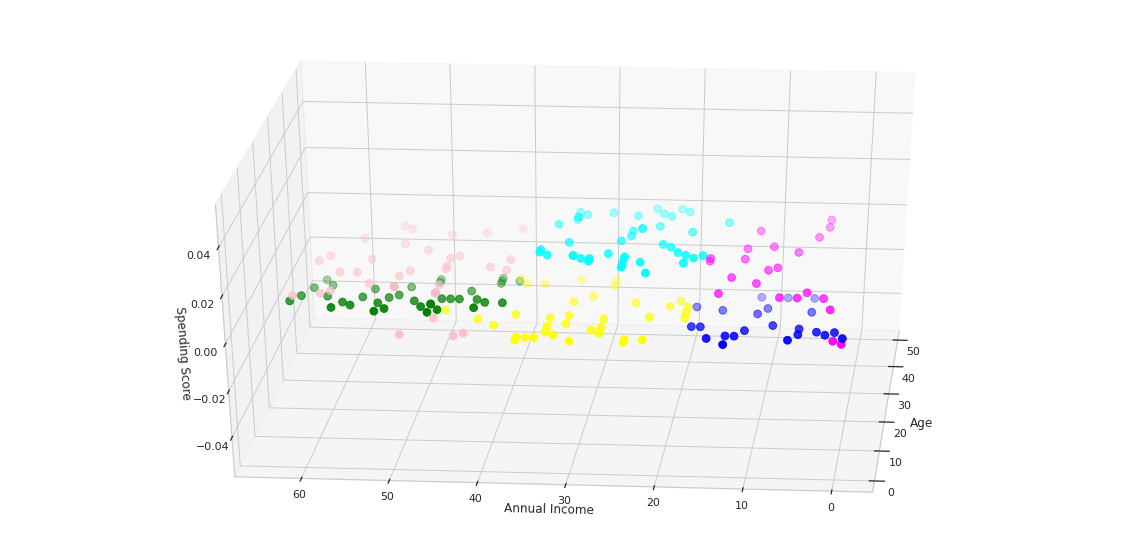

In [111]:
clusters = kmeans.fit_predict(X3)

mall['label'] = clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize =(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mall.Age[mall.label ==0], mall['Annual Income (k$)'][mall.label ==0], c='blue', s=60)
ax.scatter(mall.Age[mall.label ==1], mall['Annual Income (k$)'][mall.label ==1], c='pink', s=60)
ax.scatter(mall.Age[mall.label ==2], mall['Annual Income (k$)'][mall.label ==2], c='green', s=60)
ax.scatter(mall.Age[mall.label ==3], mall['Annual Income (k$)'][mall.label ==3], c='aqua', s=60)
ax.scatter(mall.Age[mall.label ==4], mall['Annual Income (k$)'][mall.label ==4], c='magenta', s=60)
ax.scatter(mall.Age[mall.label ==5], mall['Annual Income (k$)'][mall.label ==5], c='yellow', s=60)
ax.view_init(30,185)
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score') 
plt.show()

Observation: Our 3-d visual applies all three features from our clustering attempts to produce the 6 clusters we deduced from applying the Elbow Method above from X3. 

Conclusion: We have identified clusters to segment our 200 mall customers based on their 'Age', 'Annual Income (k$)', and 'spend_score' into six cohorts. These cohorts represent groups that marketing my wish to target based on the size of their cohorts.